# Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Dropping CustomerID since it seems of no use
data.drop('CustomerID', axis=1, inplace=True)

In [4]:
data.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


**Some Insights from above analysis**
1. Male are older than female.
2. Male earn slightly more than female on an average.
3. Female tends to spend more as compared to male.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
# Checking if there is any irregularity in data

In [7]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Exploratory Data Analysis

Making two separate DataFrames for Male and Female

In [8]:
datam = data[data['Gender']=='Male']
dataf = data[data['Gender']=='Female']

Checking variation of the parameters in both gender through various plots.

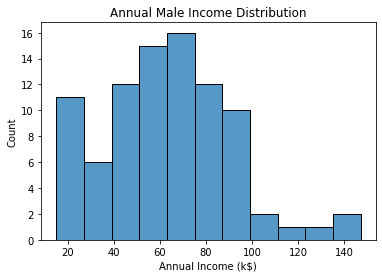

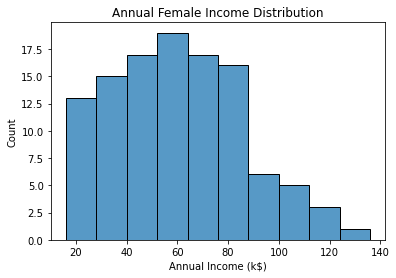

In [9]:
sb.histplot(datam['Annual Income (k$)'], binwidth=12)
plt.title('Annual Male Income Distribution')
plt.show()

sb.histplot(dataf['Annual Income (k$)'], binwidth=12)
plt.title('Annual Female Income Distribution')
plt.show()

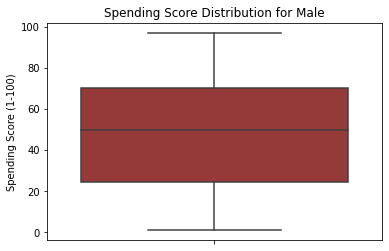

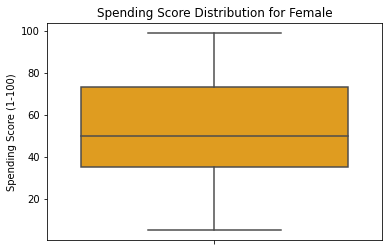

In [10]:
sb.boxplot(y=datam['Spending Score (1-100)'], color='brown')
plt.title('Spending Score Distribution for Male')
plt.show()

sb.boxplot(y=dataf['Spending Score (1-100)'], color='orange')
plt.title('Spending Score Distribution for Female')
plt.show()

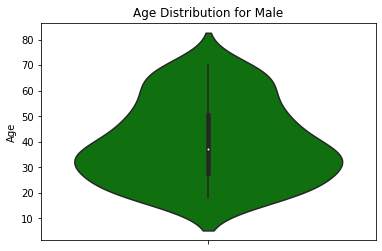

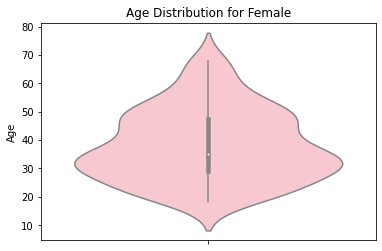

In [11]:
sb.violinplot(y=datam['Age'], color='Green')
plt.title('Age Distribution for Male')
plt.show()

sb.violinplot(y=dataf['Age'], color='Pink')
plt.title('Age Distribution for Female')
plt.show()

Both Male and Female show nearly similar behaviour in all of the three paramaters

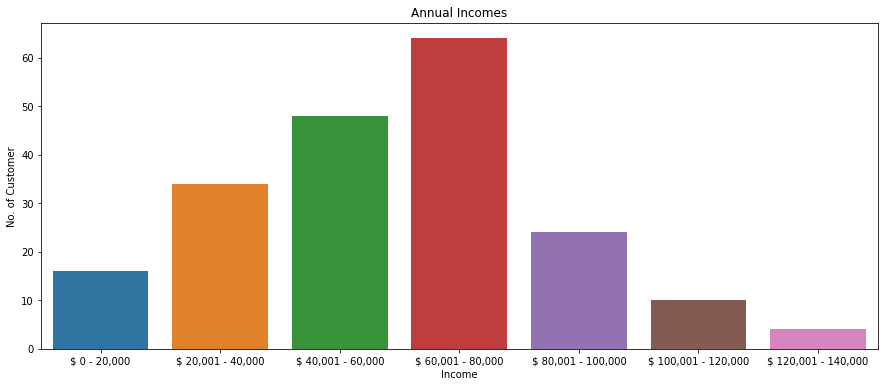

In [12]:
ai0_20 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 20)]
ai21_40 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 21) & (data["Annual Income (k$)"] <= 40)]
ai41_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 41) & (data["Annual Income (k$)"] <= 60)]
ai61_80 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 80)]
ai81_100 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 81) & (data["Annual Income (k$)"] <= 100)]
ai101_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 101) & (data["Annual Income (k$)"] <= 120)]
ai121_140 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 140)]

aix = ["$ 0 - 20,000", "$ 20,001 - 40,000", "$ 40,001 - 60,000", "$ 60,001 - 80,000", "$ 80,001 - 100,000", "$ 100,001 - 120,000", "$ 120,001 - 140,000"]
aiy = [len(ai0_20.values), len(ai21_40.values), len(ai41_60.values), len(ai61_80.values), len(ai81_100.values), len(ai101_120.values), len(ai121_140.values)]

plt.figure(figsize=(15,6))
sb.barplot(x=aix, y=aiy)
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("No. of Customer")
plt.show()

Most people have Annual Income between $ 60k-80k

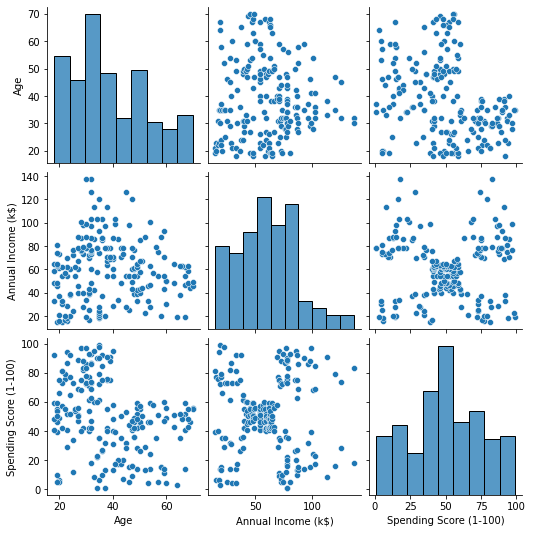

In [13]:
sb.pairplot(data)
plt.show()

# KMeans Algorithm

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Preprocessing using Min Max Scaler

In [15]:
scaler = MinMaxScaler()

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

scaler.fit(data[['Annual Income (k$)']])
data['Annual Income (k$)'] = scaler.transform(data[['Annual Income (k$)']])

scaler.fit(data[['Spending Score (1-100)']])
data['Spending Score (1-100)'] = scaler.transform(data[['Spending Score (1-100)']])


In [16]:
#Scaled Data
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,0.019231,0.000000,0.387755
1,Male,0.057692,0.000000,0.816327
2,Female,0.038462,0.008197,0.051020
3,Female,0.096154,0.008197,0.775510
4,Female,0.250000,0.016393,0.397959


Elbow Plot to find the optimum value of k


In [17]:
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

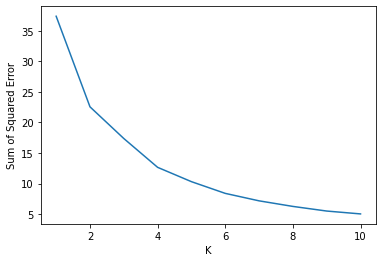

In [18]:
#Elbow Plot
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)
plt.show()

Optimum Value from Elbow plot seems to be 4.

In [19]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(data[['Age','Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 0, 3, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [20]:
data['label']=y_predicted
data.head(100)

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,0.019231,0.000000,0.387755,0
1,Male,0.057692,0.000000,0.816327,0
2,Female,0.038462,0.008197,0.051020,0
3,Female,0.096154,0.008197,0.775510,0
4,Female,0.250000,0.016393,0.397959,0
...,...,...,...,...,...
95,Male,0.115385,0.368852,0.520408,0
96,Female,0.557692,0.368852,0.469388,1
97,Female,0.173077,0.368852,0.500000,0
98,Male,0.576923,0.377049,0.418367,1


Plotting the labeled data


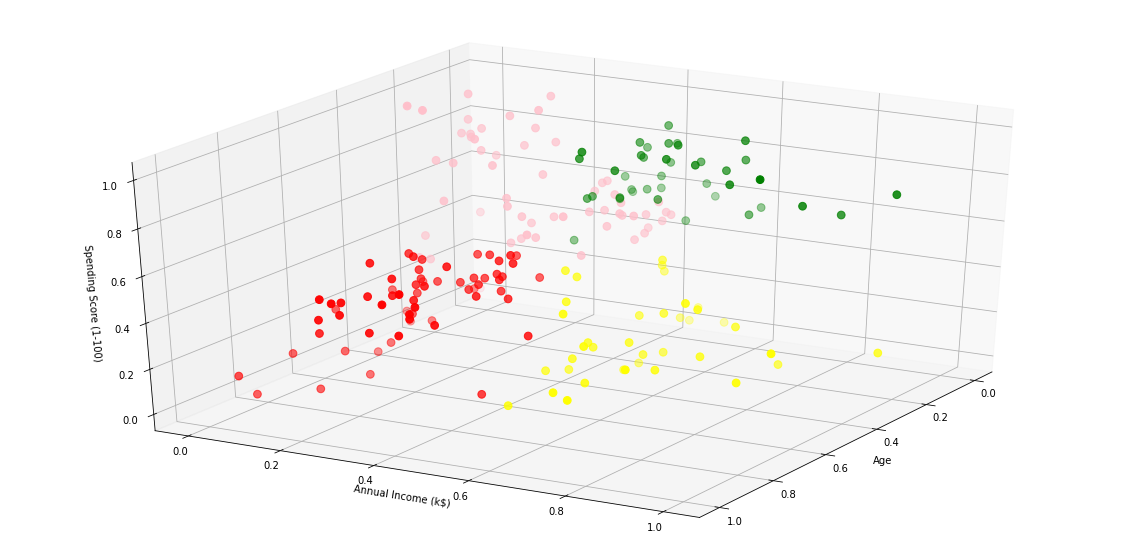

In [21]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='pink', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='yellow', s=60)

ax.view_init(30, 30)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()